In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats, optimize

## Part 1

In [2]:
def get_data(a,w,nevt):
    count = 0
    data = []
    while count < nevt:
        y = -np.log(stats.uniform.rvs())
        if 1+2*a*np.cos(y) > (1+2*a)*stats.uniform.rvs():
            data.append((1+w)*y)
            count += 1
    
    return data

## Part 2

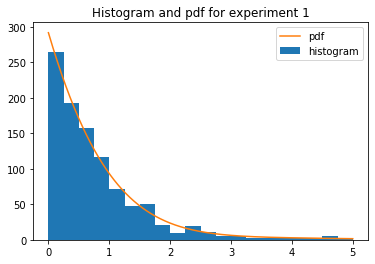

In [3]:
np.random.seed(12345)
a = 0.2
w = 0
nevt = 1000
data = get_data(a,w,nevt)
plt.hist(data, bins=20, range=(0,5), label='histogram')
y_plot = np.linspace(0,5,1000)
pdf_plot = 1/(1+a)*(1+2*a*np.cos(y_plot))*np.exp(-y_plot)
plt.plot(y_plot, pdf_plot*nevt*0.25, label='pdf')
plt.title("Histogram and pdf for experiment 1")
plt.legend()

## Part 3

In [4]:
def negLogLikelihood(a):
    log_sum = 0
    for y_val in data:
        log_sum -= np.log(1/(1+a)*(1+2*a*np.cos(y_val))*np.exp(-y_val))
    return log_sum    

## Part 4

Text(0, 0.5, 'negative log likelihood')

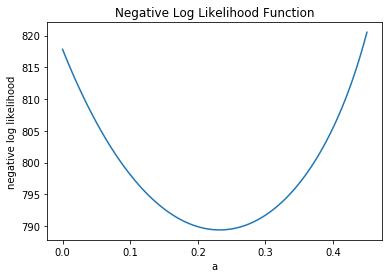

In [5]:
a_arr = np.linspace(0, 0.45, 100)
negLog_array = np.array([negLogLikelihood(a_val) for a_val in a_arr])
plt.plot(a_arr, negLog_array)
plt.title('Negative Log Likelihood Function')
plt.xlabel('a')
plt.ylabel('negative log likelihood')

## Part 5

In [6]:
result = optimize.minimize_scalar(negLogLikelihood, bounds=(0,0.45), method='bounded') 
a_hat = result.x

print("The maximum likelihood estimate for a is {0:5.3f}".format(a_hat))

The maximum likelihood estimate for a is 0.232


## Part 6

In [7]:
a_hat_arr = np.zeros(100)
for i in range(100):
    data = get_data(a,w,nevt)
    result = optimize.minimize_scalar(negLogLikelihood, bounds=(0,0.45), method='bounded') 
    a_hat_arr[i] = result.x
print("The mean of the estimates is {0:5.3f}".format(np.mean(a_hat_arr)))
print("The standard deviation of the estimates is {0:5.3f}".format(np.std(a_hat_arr)))

The mean of the estimates is 0.199
The standard deviation of the estimates is 0.033


## Part 7

In [8]:
a = 0.25
w = 0
for i in range(100):
    data = get_data(a,w,nevt)
    result = optimize.minimize_scalar(negLogLikelihood, bounds=(0,0.45), method='bounded') 
    a_hat_arr[i] = result.x
print("The mean of the estimates is {0:5.3f}".format(np.mean(a_hat_arr)))
print("The standard deviation of the estimates is {0:5.3f}".format(np.std(a_hat_arr)))

The mean of the estimates is 0.250
The standard deviation of the estimates is 0.032


## Part 8

In [9]:
a1 = 0.2
a2 = 0.25
a_hat_arr_1 = np.zeros(100)
a_hat_arr_2 = np.zeros(100)
for i in range(100):
    w = random.gauss(0, 0.05) # a.
    data = get_data(a1,w,100) # b.
    result = optimize.minimize_scalar(negLogLikelihood, bounds=(0,0.45), method='bounded') 
    a_hat_arr_1[i] = result.x # c.
    data = get_data(a2,2*w,100)
    result = optimize.minimize_scalar(negLogLikelihood, bounds=(0,0.45), method='bounded') 
    a_hat_arr_2[i] = result.x

In [10]:
cov_matr = np.cov(a_hat_arr_1, a_hat_arr_2)
var1 = cov_matr[0,0]
covar = cov_matr[0,1]
var2 = cov_matr[1,1]
coeff = covar/np.sqrt(var1*var2)

print("The variance of the estimates in experiment 1 is {0:5.3f}".format(var1))
print("The variance of the estimates in experiment 2 is {0:5.3f}".format(var2))
print("The covariance of the estimates is {0:5.3f}".format(covar))
print("The correlation coefficient is {0:5.3f}".format(coeff))

The variance of the estimates in experiment 1 is 0.011
The variance of the estimates in experiment 2 is 0.016
The covariance of the estimates is 0.003
The correlation coefficient is 0.248


## Part 9

The mean is given by $\hat{M} = \frac{1}{2}(\hat{A}_1 + \hat{A}_2)$. So the error in the mean is $\sigma_{\hat{M}}^2 = \sqrt{\frac{1}{4}(\sigma_{\hat{A}_1}^2+\sigma_{\hat{A}_2}^2+2V_{12})}$

In [11]:
err_1 = 0.047
err_2 = 0.084
err_mean = np.sqrt(0.25*(err_1**2+err_2**2+2*covar))
print("The error in the mean is {0:5.3f}".format(err_mean))

The error in the mean is 0.063364


## Part 10

In [12]:
covar = 0
err_mean = np.sqrt(0.25*(err_1**2+err_2**2+2*covar))
print("The error in the mean if the covariance is 0 is {0:5.3f}".format(err_mean))

The error in the mean if the covariance is 0 is 0.048127
